In [ ]:
# 1 Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) 
# danego pracownika, a oceną wydajności pracy (PerformanceScore)?

# 2 Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak 
# najdłuższym stażu pracowników?

# 3 Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy 
# (EmpSatisfaction)?

# 4 Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

# 5 Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [12]:
df = pd.read_csv('HRDataset.csv')

In [150]:
df.head().transpose()

,0,1,2,3,4
Employee_Name,"Brown, Mia","LaRotonda, William","Steans, Tyrone","Howard, Estelle","Singh, Nan"
EmpID,1103024456.0,1106026572.0,1302053333.0,1211050782.0,1307059817.0
MarriedID,1.0,0.0,0.0,1.0,0.0
MaritalStatusID,1.0,2.0,0.0,1.0,0.0
GenderID,0.0,1.0,1.0,0.0,0.0
EmpStatusID,1.0,1.0,1.0,1.0,1.0
DeptID,1.0,1.0,1.0,1.0,1.0
PerfScoreID,3.0,3.0,3.0,3.0,3.0
FromDiversityJobFairID,1.0,0.0,0.0,0.0,0.0
PayRate,28.5,23.0,29.0,21.5,16.56


<AxesSubplot: >

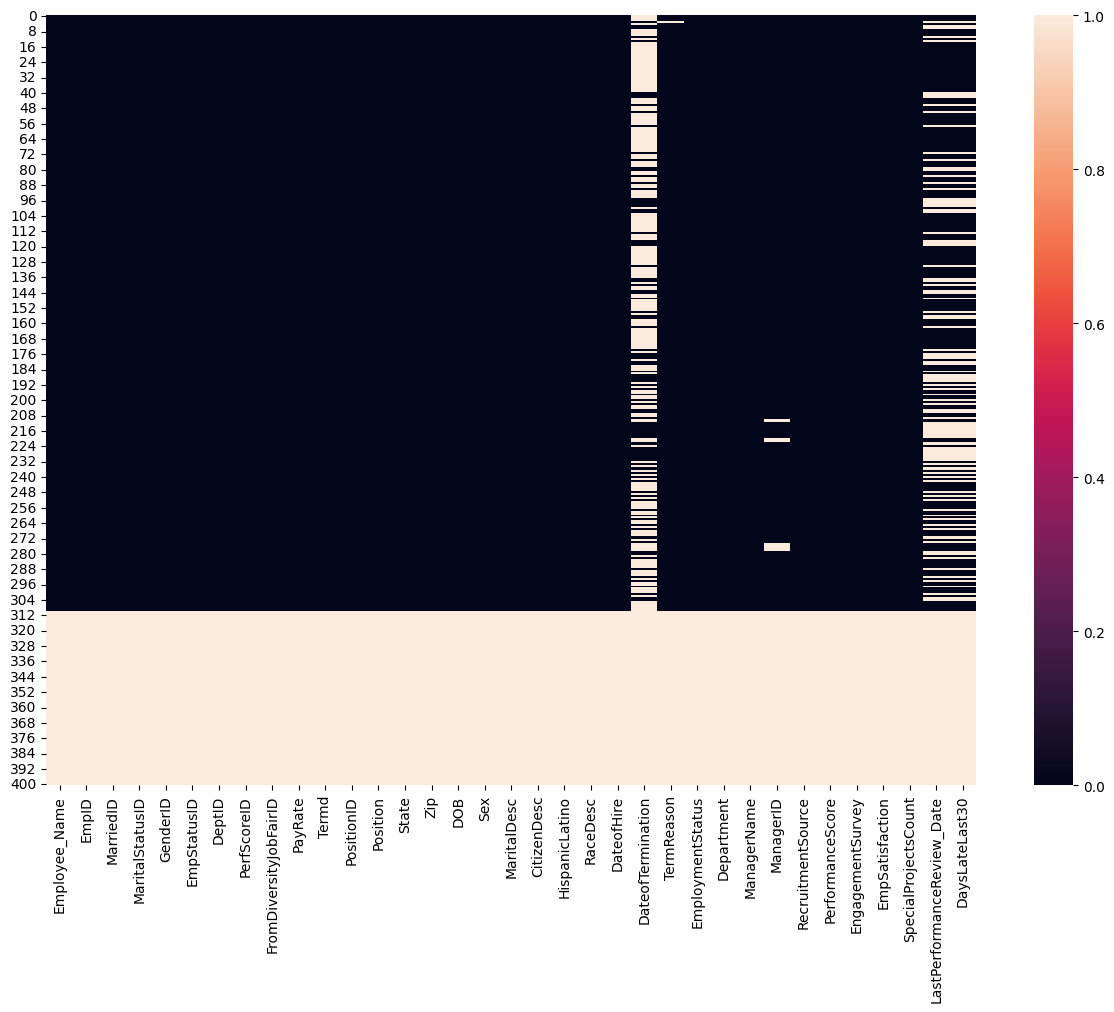

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [13]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'], axis = 1, inplace = True)

<AxesSubplot: >

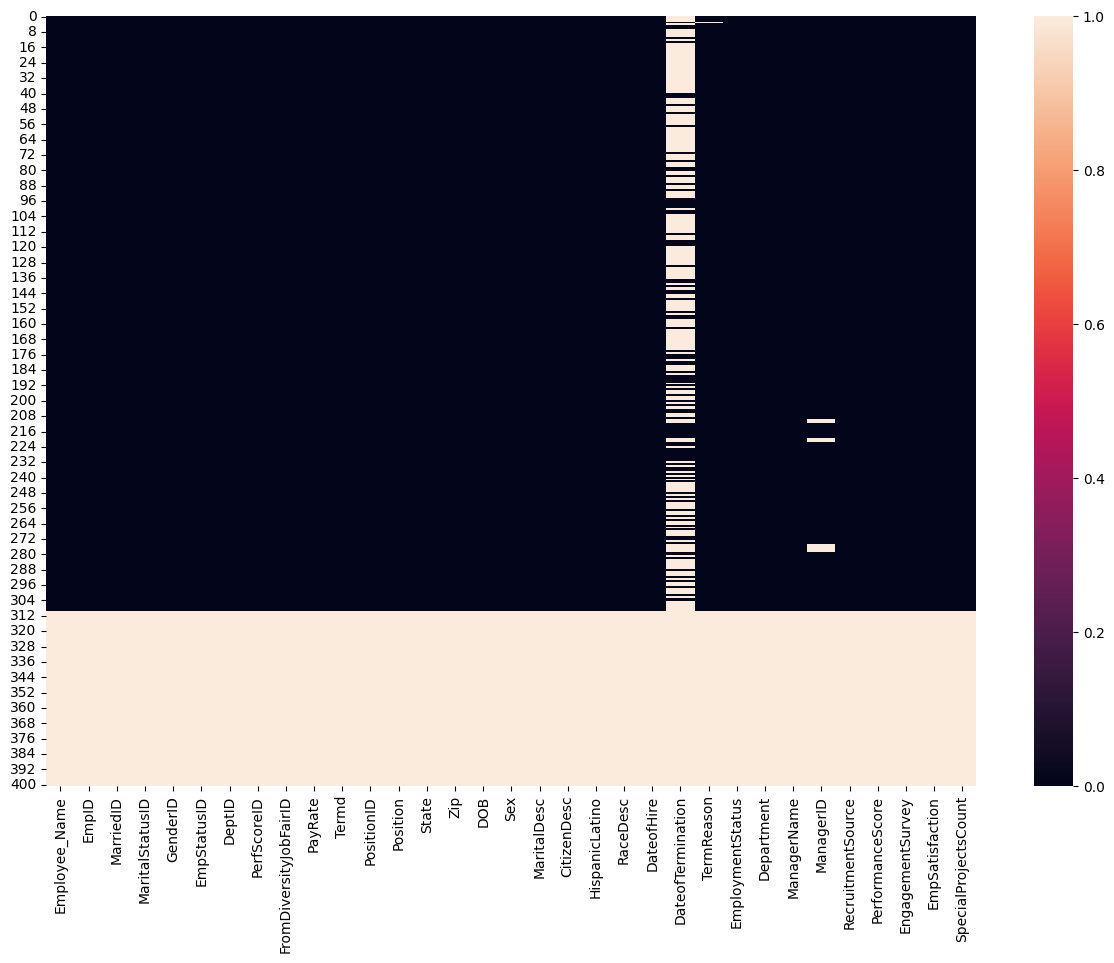

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [17]:
df.dropna(thresh =2, inplace = True )

<AxesSubplot: >

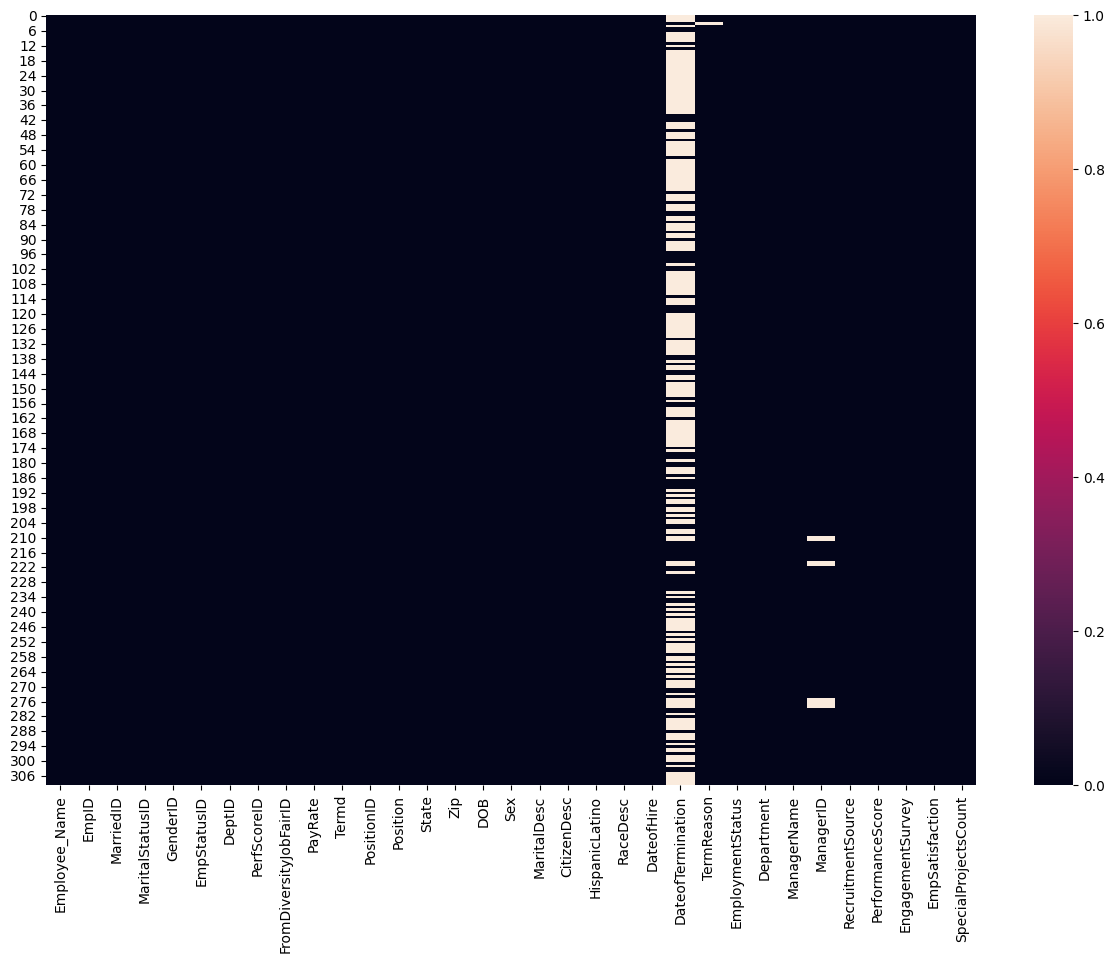

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [ ]:
# 1 Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) 
# danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [31]:
dfpar= df[['ManagerID','PerformanceScore','EmpID']]

In [35]:
dfpar

,ManagerID,PerformanceScore,EmpID
0,1.0,Fully Meets,1.103024e+09
1,1.0,Fully Meets,1.106027e+09
2,1.0,Fully Meets,1.302053e+09
3,1.0,Fully Meets,1.211051e+09
4,1.0,Fully Meets,1.307060e+09
...,...,...,...
305,7.0,Fully Meets,1.411071e+09
306,7.0,Fully Meets,1.108028e+09
307,7.0,Fully Meets,9.040136e+08
308,7.0,Fully Meets,1.308061e+09


In [121]:
# IDEA: create a list with Base distribution and all 24 other distributions. Put all of it on a Diagram
len(df['ManagerID'].unique())

24

In [118]:
dfsort = df[['ManagerID','PerformanceScore']].value_counts()#.sort_values(by='ManagerID')
#print(dfsort)
print(df['PerformanceScore'].value_counts(normalize=True))
print(df[['ManagerID','PerformanceScore']].value_counts(normalize=True))

Fully Meets          0.783871
Exceeds              0.119355
Needs Improvement    0.058065
PIP                  0.038710
Name: PerformanceScore, dtype: float64
ManagerID  PerformanceScore 
14.0       Fully Meets          0.062914
16.0       Fully Meets          0.059603
20.0       Fully Meets          0.059603
18.0       Fully Meets          0.059603
19.0       Fully Meets          0.059603
11.0       Fully Meets          0.049669
22.0       Fully Meets          0.049669
4.0        Fully Meets          0.049669
2.0        Fully Meets          0.043046
7.0        Fully Meets          0.043046
17.0       Fully Meets          0.039735
39.0       Fully Meets          0.033113
21.0       Fully Meets          0.033113
12.0       Fully Meets          0.029801
13.0       Fully Meets          0.026490
12.0       Exceeds              0.023179
1.0        Fully Meets          0.019868
10.0       Fully Meets          0.019868
12.0       PIP                  0.013245
5.0        Fully Meets          0

In [65]:
#sns.pairplot(df[['ManagerID','PerformanceScore']], hue='ManagerID', palette='bright')
#plt.show()
dfparg = dfpar.groupby(['ManagerID','PerformanceScore']).count()
dfparg

EmpID
ManagerID PerformanceScore        
1.0       Fully Meets            6
2.0       Exceeds                4
          Fully Meets           13
          Needs Improvement      2
3.0       Fully Meets            1
4.0       Exceeds                2
          Fully Meets           15
5.0       Exceeds                2
          Fully Meets            4
          Needs Improvement      1
6.0       Exceeds                1
          Fully Meets            3
7.0       Fully Meets           13
          PIP                    1
9.0       Fully Meets            2
10.0      Exceeds                2
          Fully Meets            6
          Needs Improvement      1
11.0      Exceeds                3
          Fully Meets           15
          Needs Improvement      1
          PIP                    2
12.0      Exceeds                7
          Fully Meets            9
          Needs Improvement      1
          PIP                    4
13.0      Fully Meets            8
14.0      Exceeds                1
          Fully Meets           19
          Needs Improvement      1
15.0      Fully Meets            2
          Needs Improvement      1
16.0      Exceeds                2
          Fully Meets           18
          Needs Improvement      2
17.0      Fully Meets           12
          PIP                    2
18.0      Exceeds                3
          Fully Meets           18
          Needs Improvement      1
19.0      Exceeds                2
          Fully Meets           18
          Needs Improvement      1
20.0      Exceeds                2
          Fully Meets           18
          Needs Improvement      1
          PIP                    1
21.0      Exceeds                2
          Fully Meets           10
          PIP                    1
22.0      Exceeds                2
          Fully Meets           15
          Needs Improvement      3
          PIP                    1
30.0      Fully Meets            1
39.0      Exceeds                1
          Fully Meets           10
          Needs Improvement      2

In [66]:
dfparg.reset_index(inplace = True)

In [67]:
dfparg.rename(columns={'EmpID':'Count'}, inplace = True)

In [69]:
print(dfparg['PerformanceScore'].value_counts())
print(dfparg['PerformanceScore'].value_counts(normalize ="True"))

Fully Meets          23
Exceeds              15
Needs Improvement    13
PIP                   7
Name: PerformanceScore, dtype: int64


In [52]:
print(dfparg['PerformanceScore'].unique())

['Fully Meets' 'Exceeds' 'Needs Improvement' 'PIP']


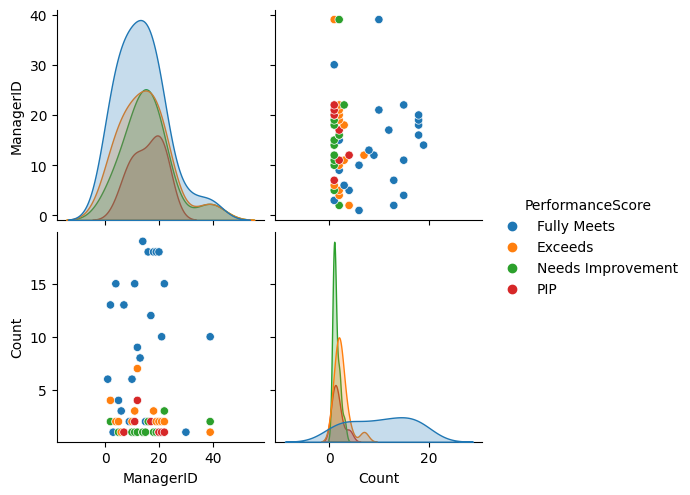

In [63]:
sns.pairplot(dfparg[['ManagerID','Count','PerformanceScore']],hue = 'PerformanceScore')
plt.show()

In [115]:
dfman = pd.crosstab(df['ManagerID'],df['PerformanceScore'])
print(dfman)
dfman['pos']=dfman['Fully Meets']+dfman['Exceeds']
dfman['neg']=dfman['Needs Improvement']+dfman['PIP']
dfman.drop(['Fully Meets','Exceeds','Needs Improvement','PIP'],axis =1,inplace = True )
dfman
#dfman[['ManagerID','pos','neg']]

PerformanceScore  Exceeds  Fully Meets  Needs Improvement  PIP
ManagerID                                                     
1.0                     0            6                  0    0
2.0                     4           13                  2    0
3.0                     0            1                  0    0
4.0                     2           15                  0    0
5.0                     2            4                  1    0
6.0                     1            3                  0    0
7.0                     0           13                  0    1
9.0                     0            2                  0    0
10.0                    2            6                  1    0
11.0                    3           15                  1    2
12.0                    7            9                  1    4
13.0                    0            8                  0    0
14.0                    1           19                  1    0
15.0                    0            2                 

PerformanceScore,pos,neg
ManagerID,,
1.0,6,0
2.0,17,2
3.0,1,0
4.0,17,0
5.0,6,1
6.0,4,0
7.0,13,1
9.0,2,0
10.0,8,1


In [ ]:
# 2 Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak 
# najdłuższym stażu pracowników?

In [122]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [123]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [130]:
# Converting dates to date format
df['DOB']=pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination']=pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire']=pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [187]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
5,2013-09-25,1987-06-14,2011-09-26
6,2014-08-02,2064-06-01,2011-08-15
7,NaT,2063-05-15,2014-08-18
8,NaT,1987-05-14,2012-02-20
9,NaT,1988-09-14,2014-08-18


In [132]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [133]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

<AxesSubplot: xlabel='RecruitmentSource', ylabel='Seniority'>

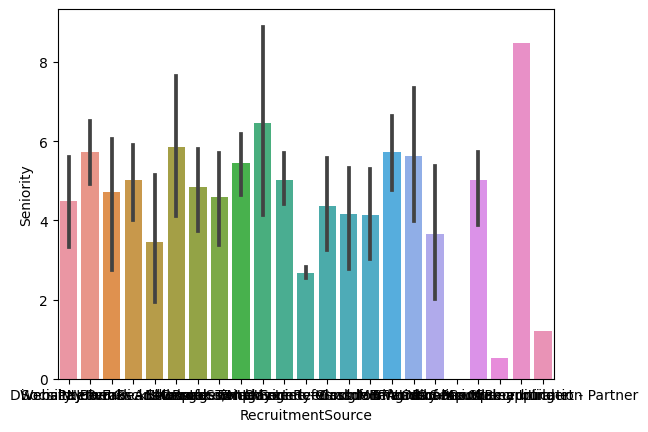

In [195]:
sns.barplot(x='RecruitmentSource',y='Seniority',data=df)#[df['Seniority']>4])

In [193]:
df[['RecruitmentSource','Seniority']].groupby(['RecruitmentSource']).mean('Seniority').sort_values(by ='Seniority', ascending =False).head(10)

,Seniority
RecruitmentSource,
Careerbuilder,8.482036
Other,6.453247
Billboard,5.862886
MBTA ads,5.729634
Website Banner Ads,5.721594
Information Session,5.623661
Professional Society,5.437757
Employee Referral,5.026002
Pay Per Click - Google,5.009457


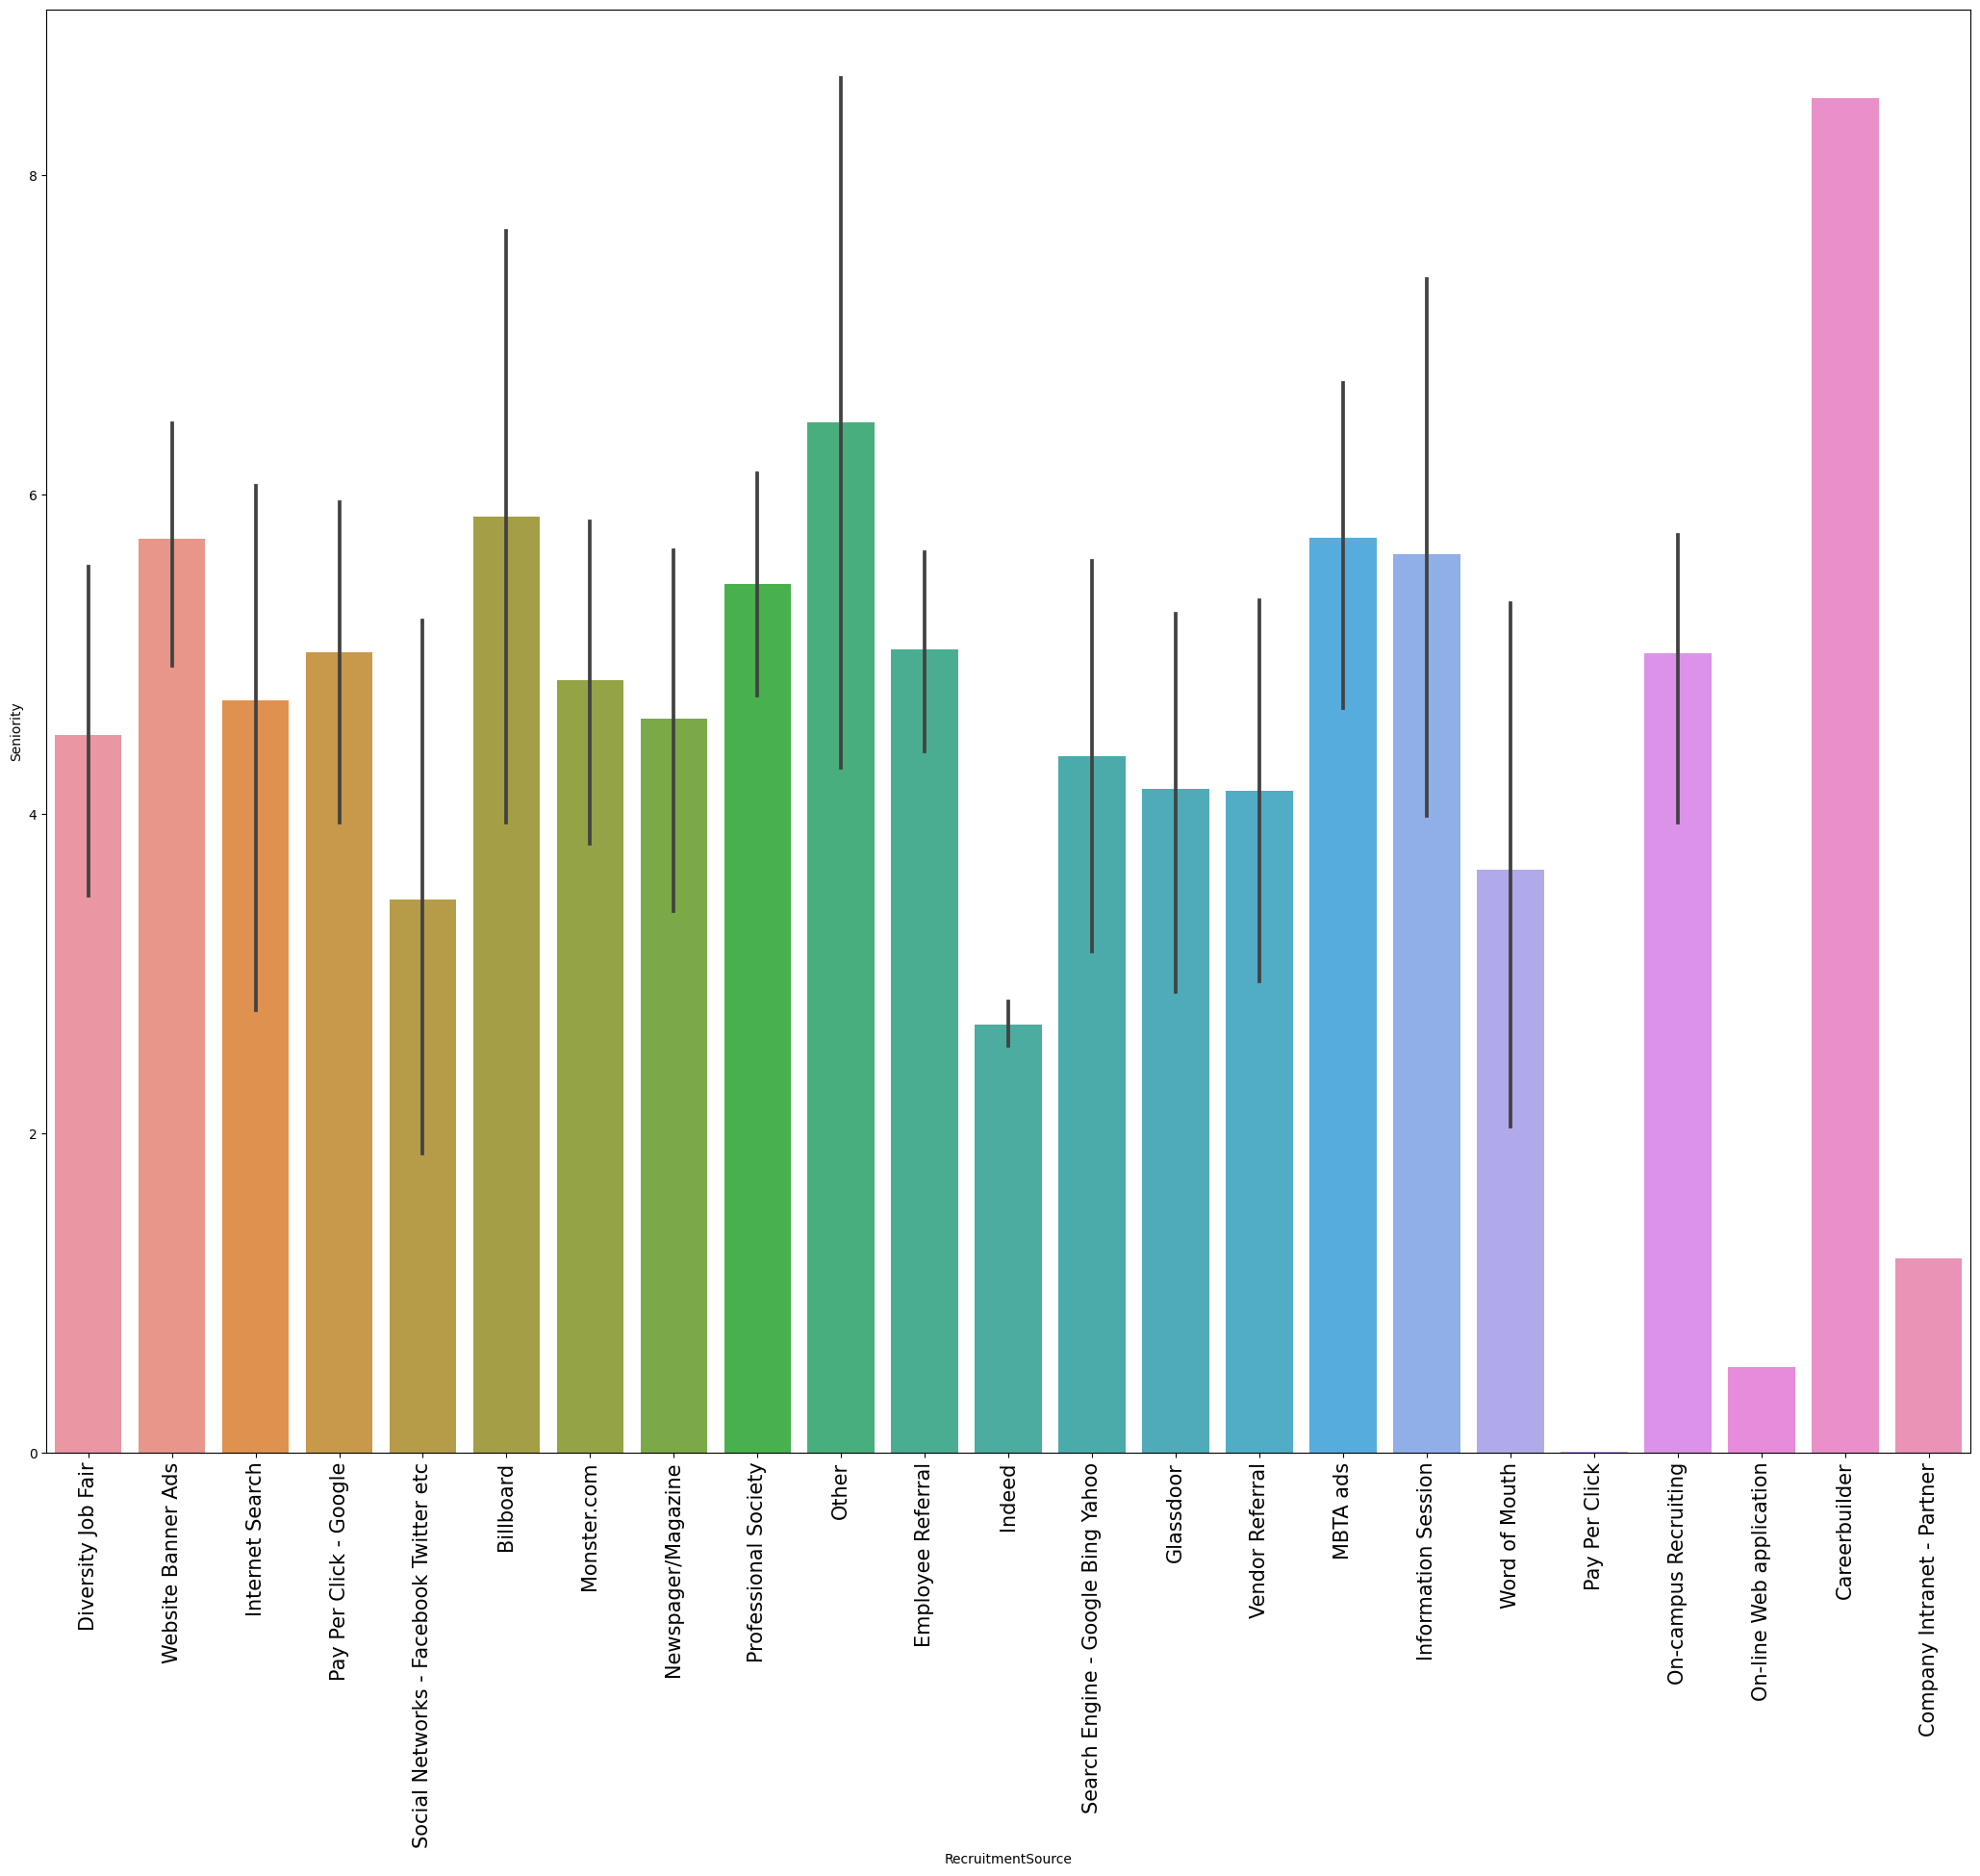

In [197]:
fig = plt.figure(figsize=(20,15))
#fig.plt.xticks(rotation=90)
axes = fig.add_axes([0,0,1,1])
sns.barplot(x = 'RecruitmentSource', y = 'Seniority',  data = df)# [df['Seniority']>6])
axes.tick_params(axis='x', labelrotation=90)
axes.tick_params(axis='x', labelsize=15)
#plt.ylabel('ylabel', fontsize=16)
#axes.xaxis.set_major_locator(plt.MaxNLocator(7))

In [ ]:
# 3 Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy 
# (EmpSatisfaction)?

In [157]:
df[['MaritalDesc','EmpSatisfaction']].groupby('MaritalDesc').mean('EmpSatisfaction').sort_values('EmpSatisfaction', ascending = False)

,EmpSatisfaction
MaritalDesc,
Widowed,4.250000
Divorced,4.033333
Single,3.970803
Separated,3.833333
Married,3.747967


In [ ]:
#Most satisfied are Wirowed and least Married

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

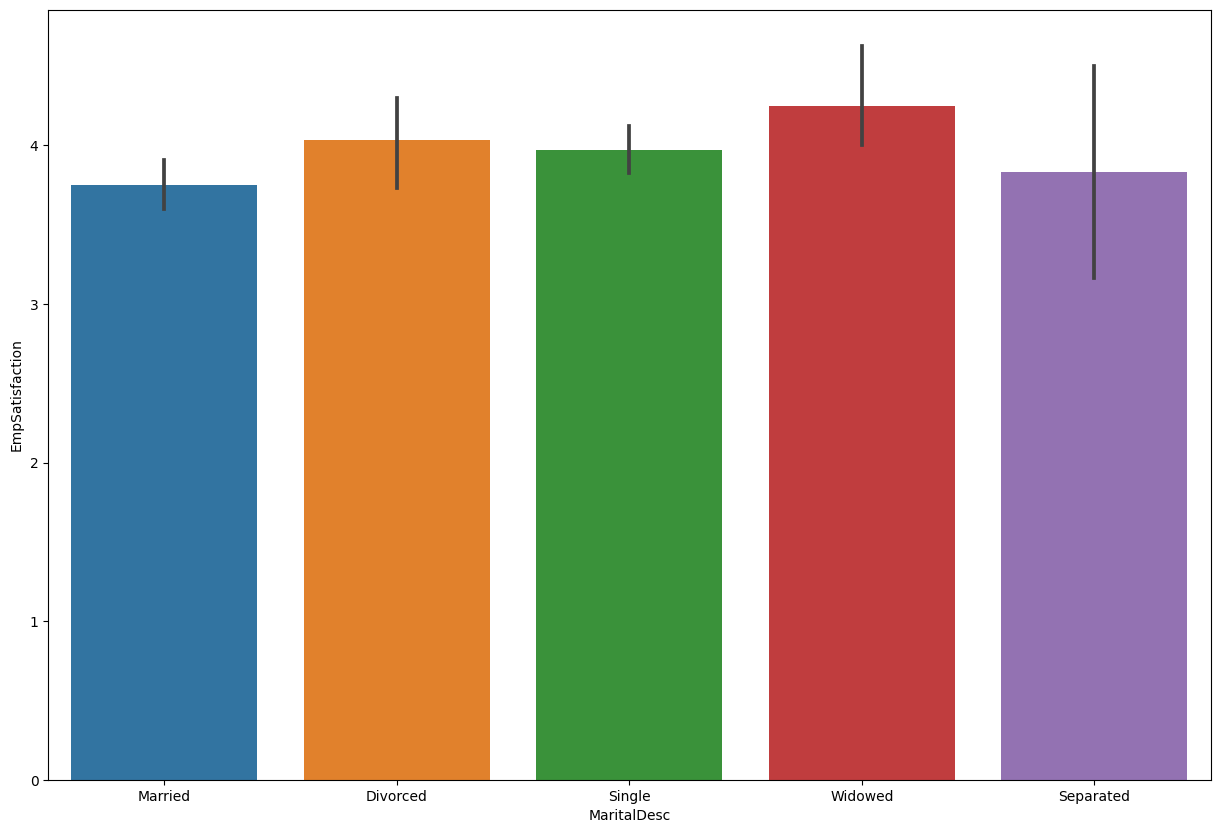

In [163]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'MaritalDesc', y = 'EmpSatisfaction',  data = df)

In [ ]:
# 4 Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [199]:
import datetime as dt

def count_age(row):
    end_date = dt.datetime(2019,9,27)
    return (end_date - row['DOB'])/np.timedelta64(1,'Y')

In [200]:
df['age'] = df.apply(lambda row: count_age(row),axis =1)

In [218]:
df[['DOB','age']].head()

,DOB,age
0,1987-11-24,31.841858
1,1984-04-26,35.420303
2,1986-09-01,33.071179
3,1985-09-16,34.029446
4,1988-05-19,31.357249


In [212]:
#df['YOB'] =pd.DatetimeIndex(df['DOB']).year()
df['YOB'] =df['DOB'].dt.year
df['YOB'].unique()

array([1987, 1984, 1986, 1985, 1988, 2064, 2063, 1969, 1971, 2054, 1975,
       1982, 1989, 1991, 1974, 1979, 1970, 1990, 2068, 2065, 1980, 1983,
       1972, 1981, 2066, 1973, 1976, 1977, 1978, 2055, 2067, 2061, 2058,
       1992, 2051, 2059, 2052, 2053], dtype=int64)

In [221]:
def mod_date(row):
    
    if row['YOB'] > 2010:
        age = row['age'] + 100
    else:
        age = row['age']
    return age

In [222]:
df['age']= df.apply(lambda row: mod_date(row),axis =1)

In [228]:
df[['DOB','age']].head(5)

,DOB,age
0,1987-11-24,31.841858
1,1984-04-26,35.420303
2,1986-09-01,33.071179
3,1985-09-16,34.029446
4,1988-05-19,31.357249


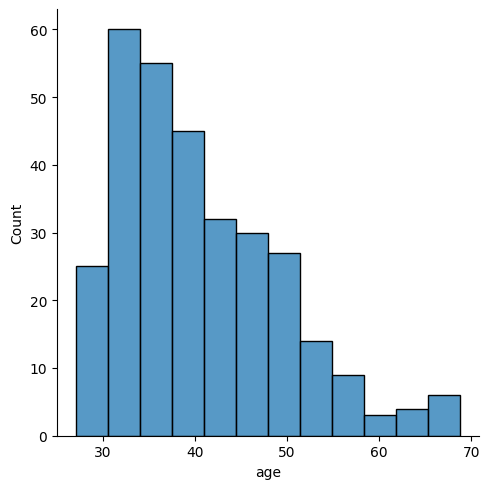

In [227]:
sns.displot(df['age'])

In [ ]:
# 5 Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

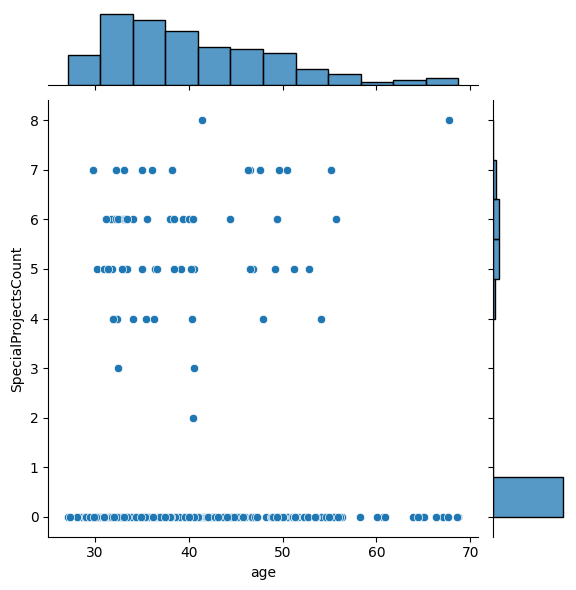

In [229]:
sns.jointplot(x='age',y='SpecialProjectsCount',data=df)

In [ ]:
#More the younger employees work on average more often on special projects